Importing the Libraries

In [1]:
import pandas as pd
import pickle
import random
import gzip
import gensim 
import logging
import tensorflow as tf
import tensorflow_hub as hub
from keras import layers
from tensorflow import keras
import bert
import math
import re as re
import transformers
import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\DELL\Desktop\justapp\newsdemo\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 Dataset Loading

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\justapp\Text Data.csv')

C:\Users\DELL\AppData\Local\Temp\ipykernel_5364\461692094.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\DELL\Desktop\justapp\Text Data.csv')


Read & visualize data

In [3]:
df.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Exploratory Dataset Analysis

In [4]:
df.shape


(35868, 172)

In [5]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
df.tail()


,title,text,subject,date
35863,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
35864,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
35865,Sunnistan: US and Allied â€˜Safe Zoneâ€™ Plan ...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
35866,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
35867,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [7]:
df.shape


(35868, 4)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35868 entries, 0 to 35867
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    35868 non-null  object
 1   text     35868 non-null  object
 2   subject  35847 non-null  object
 3   date     35847 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [9]:
df.isna().sum()

title       0
text        0
subject    21
date       21
dtype: int64

In [10]:
df["subject"].fillna( method ='ffill', inplace = True)
df["date"].fillna( method ='ffill', inplace = True)

In [11]:
df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [12]:
df['subject'].value_counts()

politicsNews                                                                                                                                                                                                                                                                                    11272
worldnews                                                                                                                                                                                                                                                                                       10144
politics                                                                                                                                                                                                                                                                                         6841
left-news                                                                                                             

In [13]:
# Dropping the rows of not belong to News classes "contain text"
df = df[df["subject"].str.contains("politicsNews|worldnews|politics|left-news|Government News|US_News|Middle-east") == True]
df


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
35863,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
35864,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
35865,Sunnistan: US and Allied â€˜Safe Zoneâ€™ Plan ...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
35866,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [14]:
print(df['subject'].value_counts())

politicsNews       11272
worldnews          10144
politics            6841
left-news           4460
Government News     1570
US_News              783
Middle-east          777
Name: subject, dtype: int64


In [15]:
df.describe()

,title,text,subject,date
count,35847,35847,35847,35847
unique,29679,29595,7,2170
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017"
freq,14,627,11272,182


In [16]:
print(set(df['subject']))
print('Number of subjects: ',len(set(df['subject'])))

{'Government News', 'US_News', 'worldnews', 'politics', 'left-news', 'Middle-east', 'politicsNews'}
Number of subjects:  7


In [17]:
# Choosing 7 categories above dataset
data = df[(df['subject']=='politicsNews') | (df['subject']=='worldnews') | (df['subject']=='News') | (df['subject']=='politics') | (df['subject']=='left-news') | (df['subject']=='Government News') | (df['subject']=='US_News')| (df['subject']=='Middle-east')].copy()
data.index = [i for i in range(data.shape[0])]

In [18]:
# Display the shape of data
data.shape

(35847, 4)

In [19]:
# Display the column names
data.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [20]:
# Display the type of data
data.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [21]:
# Display the number of missing values for each column
data.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

Distribution of subject values

<AxesSubplot:>

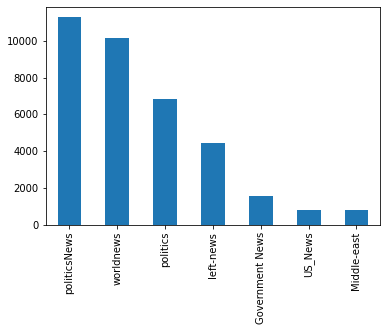

In [22]:
# Display the distribution of subject
data['subject'].value_counts().plot.bar()

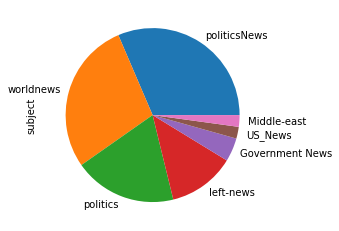

In [23]:
data['subject'].value_counts().plot(kind='pie');


In [24]:
data.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Dataset Preparation

In [25]:
data['information'] = data[['title', 'text']].apply(lambda x: ' '.join(x), axis=1)

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data["subjectEncoded"] = label_encoder.fit_transform(data['subject'])

Preprocess our dataset to remove any punctuations and special characters. By define a function that takes as input a raw text and returns the corresponding cleaned text.

In [27]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text,stem=False):
    # Lower case
    text = text.lower().strip()
    # Removing html tags
    text = re.sub(r'<[^>]+>', ' ', text)
    # Remove punctuations and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Single character removal
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    # Removing multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Removing stop words
    text =  [word.lower() for word in text.split() if word not in stopwords.words('english')]
    # lemmatize data
    stemmer = WordNetLemmatizer()
    text = [stemmer.lemmatize(word) for word in text]
    return ' '.join(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


The following script cleans all the text:

In [28]:
# preprocess the text data
L = []
sentences = list(data['information'])
for sen in sentences:
    L.append(preprocess_text(sen))

# save the result
open_file = open("text_preprocessed", "wb")
pickle.dump(L, open_file)
open_file.close()

In [ ]:
# text cleaned

data['text'] = L

Creating a BERT Tokenizer

In order to use BERT text embeddings as input to train text classification model, we need to tokenize our text. Tokenization refers to dividing a sentence into individual words. To tokenize our text, we will be using the BERT tokenizer.

In [ ]:
# Creation of the Tokenizer

BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",trainable=False)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

Define a function that accepts a single text and returns the ids of the tokenized words in the text. Next tokenize all the text in the input dataset:

In [ ]:
# Tokenizing Data

def tokenize_reviews(text_reviews):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_reviews))

tokenized_data = [tokenize_reviews(d) for d in data['text']]

Prerparing Dataset For Training

Creates a list of lists where each sublist contains tokenized text, the label of the text and the length of the text must be in the same length:

In [ ]:
# Build an X y list and shuffle the data

data_list = [[x,data['subjectEncoded'][i]] for i, x in enumerate(tokenized_data)]
random.shuffle(data_list)
shuffled_data = [(x[0], x[1]) for x in data_list]

Modeling Part 1#

1) CNN:


In [ ]:
# convert the sorted dataset into a TensorFlow input dataset shape.
processed_dataset = tf.data.Dataset.from_generator(lambda: shuffled_data, output_types=(tf.int32, tf.int32))

# pad the dataset for each batch
categories = 6
BATCH_SIZE = 32
batched_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

# We divide the dataset into test and training sets
TOTAL_BATCHES = math.ceil(len(shuffled_data) / BATCH_SIZE)
TEST_BATCHES = TOTAL_BATCHES // 10
batched_dataset.shuffle(TOTAL_BATCHES)
test_data = batched_dataset.take(TEST_BATCHES)
train_data = batched_dataset.skip(TEST_BATCHES)

In [ ]:
# Creating the model

class TEXT_MODEL(tf.keras.Model):
    
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=2,
                 dropout_rate=0.1,
                 training=False,
                 name="text_model"):
        super(TEXT_MODEL, self).__init__(name=name)
        
        self.embedding = layers.Embedding(vocabulary_size,
                                          embedding_dimensions)
        self.cnn_layer1 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=2,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer2 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=3,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer3 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=4,
                                        padding="valid",
                                        activation="relu")
        self.pool = layers.GlobalMaxPool1D()

        self.dense_1 = layers.Dense(units=dnn_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        if model_output_classes == 2:
            self.last_dense = layers.Dense(units=1,
                                           activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=model_output_classes,
                                           activation="softmax")
    
    def call(self, inputs, training):
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l) 
        l_1 = self.pool(l_1) 
        l_2 = self.cnn_layer2(l) 
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3) 
        
        concatenated = tf.concat([l_1, l_2, l_3], axis=-1) # (batch_size, 3 * cnn_filters)
        concatenated = self.dense_1(concatenated)
        concatenated = self.dropout(concatenated, training)
        model_output = self.last_dense(concatenated)
        
        return model_output

Training ans Results

In [ ]:
# Defining hyper parameters
VOCAB_LENGTH = len(tokenizer.vocab)
EMB_DIM = 200
CNN_FILTERS = 100
DNN_UNITS = 256
OUTPUT_CLASSES = 8
DROPOUT_RATE = 0.2
NB_EPOCHS = 2

In [ ]:
# We create an object of the TEXT_MODEL class and pass the hyper paramters values 
text_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

In [ ]:
# Complie the model
if OUTPUT_CLASSES == 2:
    text_model.compile(loss="binary_crossentropy",
                       optimizer="adam",
                       metrics=["accuracy"])
else:
    text_model.compile(loss="sparse_categorical_crossentropy",
                       optimizer="adam",
                       metrics=["sparse_categorical_accuracy"])

In [ ]:
# Training
text_model.fit(train_data, batch_size=BATCH_SIZE,epochs=NB_EPOCHS, validation_data=(test_data))

Epoch 1/2
1009/1009 [==============================] - 687s 679ms/step - loss: 0.5702 - sparse_categorical_accuracy: 0.7422 - val_loss: 0.4470 - val_sparse_categorical_accuracy: 0.7737
Epoch 2/2
1009/1009 [==============================] - 681s 674ms/step - loss: 0.4168 - sparse_categorical_accuracy: 0.7891 - val_loss: 0.4550 - val_sparse_categorical_accuracy: 0.7656


In [ ]:
# Evaluate the model on test data

results = text_model.evaluate(test_data)

112/112 [==============================] - 15s 137ms/step - loss: 0.4550 - sparse_categorical_accuracy: 0.7656


Evaluation

In [ ]:
# Diplaying accuracy for each model

print("Accuracy\n")
print("CNN + Bert: ", format(results[1]*100, '.2f'),"%")


Accuracy

CNN + Bert:  76.56 %


In [ ]:
# List of subjects

subj = ['politicsNews', 'worldnews', 'News', 'politics', 'GovernmentNews', 'leftnews', 'US_News', 'Middleeast']

In [ ]:
# test text

text = "Joe Biden is the new president of US"
t = preprocess_text(text)

In [ ]:
prediction = text_model.predict([tokenize_reviews(t)])
print("CNN + Bert: ",subj[np.argmax(prediction)])


1/1 [==============================] - 0s 100ms/step
CNN + Bert:  leftnews


In [ ]:
# saving the model

text_model.save('model',save_format='tf')
!apt-get install rar
!zip -r "model.zip" "/content/model"

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets
'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'zip' is not recognized as an internal or external command,
operable program or batch file.


Sentiment Analysis Part 2#

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
data['scores'] = data['text'].apply(lambda text: sid.polarity_scores(text))
data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])
data['sentiment'] = data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

In [ ]:
data.head()


,title,text,subject,date,information,subjectEncoded,scores,compound,sentiment
0,"As U.S. budget fight looms, Republicans flip t...",budget fight loom republican flip fiscal scrip...,politicsNews,"December 31, 2017","As U.S. budget fight looms, Republicans flip t...",5,"{'neg': 0.078, 'neu': 0.768, 'pos': 0.154, 'co...",0.9853,pos
1,U.S. military to accept transgender recruits o...,u military accept transgender recruit monday p...,politicsNews,"December 29, 2017",U.S. military to accept transgender recruits o...,5,"{'neg': 0.087, 'neu': 0.752, 'pos': 0.161, 'co...",0.9721,pos
2,Senior U.S. Republican senator: 'Let Mr. Muell...,senior republican senator let mr mueller job w...,politicsNews,"December 31, 2017",Senior U.S. Republican senator: 'Let Mr. Muell...,5,"{'neg': 0.074, 'neu': 0.832, 'pos': 0.093, 'co...",0.3818,pos
3,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped australian diplomat ti...,politicsNews,"December 30, 2017",FBI Russia probe helped by Australian diplomat...,5,"{'neg': 0.095, 'neu': 0.801, 'pos': 0.104, 'co...",0.3415,pos
4,Trump wants Postal Service to charge 'much mor...,trump want postal service charge much amazon s...,politicsNews,"December 29, 2017",Trump wants Postal Service to charge 'much mor...,5,"{'neg': 0.08, 'neu': 0.782, 'pos': 0.138, 'com...",0.9732,pos


Topic Modeling 
1) Non-negative Matrix Factorization (NMF):

In [ ]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=categories,random_state=42)
nmf_model.fit(vector1)

NMF(n_components=6, random_state=42)

In [ ]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([tf_idf_text.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0


c:\Users\DELL\Desktop\justapp\newsdemo\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['right', 'state', 'party', 'people', 'year', 'government', 'eu', 'police', 'court', 'said']


THE TOP 10 WORDS FOR TOPIC #1
['test', 'sanction', 'pyongyang', 'south', 'missile', 'korean', 'nuclear', 'china', 'north', 'korea']


THE TOP 10 WORDS FOR TOPIC #2
['presidential', 'russia', 'house', 'campaign', 'republican', 'white', 'said', 'donald', 'president', 'trump']


THE TOP 10 WORDS FOR TOPIC #3
['vote', 'healthcare', 'legislation', 'would', 'obamacare', 'house', 'senate', 'bill', 'republican', 'tax']


THE TOP 10 WORDS FOR TOPIC #4
['al', 'islamic', 'saudi', 'state', 'syrian', 'said', 'russian', 'iran', 'russia', 'syria']


THE TOP 10 WORDS FOR TOPIC #5
['presidential', 'election', 'comey', 'democratic', 'sander', 'campaign', 'fbi', 'email', 'hillary', 'clinton']




In [ ]:
topic_results = nmf_model.transform(vector1)
topic_results.argmax(axis=1)

data['NMF'] = topic_results.argmax(axis=1)

In [ ]:
data.head()


,title,text,subject,date,information,subjectEncoded,scores,compound,sentiment,NMF
0,"As U.S. budget fight looms, Republicans flip t...",budget fight loom republican flip fiscal scrip...,politicsNews,"December 31, 2017","As U.S. budget fight looms, Republicans flip t...",5,"{'neg': 0.078, 'neu': 0.768, 'pos': 0.154, 'co...",0.9853,pos,3
1,U.S. military to accept transgender recruits o...,u military accept transgender recruit monday p...,politicsNews,"December 29, 2017",U.S. military to accept transgender recruits o...,5,"{'neg': 0.087, 'neu': 0.752, 'pos': 0.161, 'co...",0.9721,pos,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,senior republican senator let mr mueller job w...,politicsNews,"December 31, 2017",Senior U.S. Republican senator: 'Let Mr. Muell...,5,"{'neg': 0.074, 'neu': 0.832, 'pos': 0.093, 'co...",0.3818,pos,2
3,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped australian diplomat ti...,politicsNews,"December 30, 2017",FBI Russia probe helped by Australian diplomat...,5,"{'neg': 0.095, 'neu': 0.801, 'pos': 0.104, 'co...",0.3415,pos,2
4,Trump wants Postal Service to charge 'much mor...,trump want postal service charge much amazon s...,politicsNews,"December 29, 2017",Trump wants Postal Service to charge 'much mor...,5,"{'neg': 0.08, 'neu': 0.782, 'pos': 0.138, 'com...",0.9732,pos,3


2) Latent Dirichlet Allocation (LDA):

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(data['text'])

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=categories,random_state=42)
LDA.fit(dtm)

LatentDirichletAllocation(n_components=6, random_state=42)

In [ ]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0


c:\Users\DELL\Desktop\justapp\newsdemo\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['woman', 'time', 'like', 'american', 'video', 'medium', 'said', 'police', 'year', 'people']


THE TOP 10 WORDS FOR TOPIC #1
['minister', 'donald', 'trade', 'united', 'country', 'state', 'china', 'president', 'said', 'trump']


THE TOP 10 WORDS FOR TOPIC #2
['news', 'state', 'republican', 'election', 'campaign', 'president', 'hillary', 'said', 'clinton', 'trump']


THE TOP 10 WORDS FOR TOPIC #3
['police', 'government', 'vote', 'state', 'right', 'election', 'law', 'party', 'said', 'court']


THE TOP 10 WORDS FOR TOPIC #4
['senate', 'year', 'obama', 'president', 'tax', 'state', 'house', 'trump', 'republican', 'said']


THE TOP 10 WORDS FOR TOPIC #5
['official', 'iran', 'korea', 'united', 'military', 'north', 'government', 'reuters', 'state', 'said']




In [ ]:
topic_results = LDA.transform(dtm)
topic_results.argmax(axis=1)
data['LDA'] = topic_results.argmax(axis=1)

In [ ]:
data.head()


,title,text,subject,date,information,subjectEncoded,scores,compound,sentiment,NMF,LDA
0,"As U.S. budget fight looms, Republicans flip t...",budget fight loom republican flip fiscal scrip...,politicsNews,"December 31, 2017","As U.S. budget fight looms, Republicans flip t...",5,"{'neg': 0.078, 'neu': 0.768, 'pos': 0.154, 'co...",0.9853,pos,3,4
1,U.S. military to accept transgender recruits o...,u military accept transgender recruit monday p...,politicsNews,"December 29, 2017",U.S. military to accept transgender recruits o...,5,"{'neg': 0.087, 'neu': 0.752, 'pos': 0.161, 'co...",0.9721,pos,0,3
2,Senior U.S. Republican senator: 'Let Mr. Muell...,senior republican senator let mr mueller job w...,politicsNews,"December 31, 2017",Senior U.S. Republican senator: 'Let Mr. Muell...,5,"{'neg': 0.074, 'neu': 0.832, 'pos': 0.093, 'co...",0.3818,pos,2,2
3,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped australian diplomat ti...,politicsNews,"December 30, 2017",FBI Russia probe helped by Australian diplomat...,5,"{'neg': 0.095, 'neu': 0.801, 'pos': 0.104, 'co...",0.3415,pos,2,2
4,Trump wants Postal Service to charge 'much mor...,trump want postal service charge much amazon s...,politicsNews,"December 29, 2017",Trump wants Postal Service to charge 'much mor...,5,"{'neg': 0.08, 'neu': 0.782, 'pos': 0.138, 'com...",0.9732,pos,3,4
